In [90]:
import pandas as pd
import os
import cv2
from sklearn.utils import shuffle
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import sklearn.metrics as metrics

In [31]:
data = pd.DataFrame()

In [3]:
lista_normal = []
lista_neumonia = []
for x in os.listdir("../data/chest_xray/train/NORMAL/"):
    img = imread(os.path.join("../data/chest_xray/train/NORMAL/", x))
    lista_normal.append(cv2.resize(img, (256, 256)))

In [11]:
set_normal= set()
for elemento in lista_normal:
    set_normal.add(elemento.shape)
set_normal

{(256, 256)}

In [4]:
for x in os.listdir("../data/chest_xray/train/PNEUMONIA/"):
    img = imread(os.path.join("../data/chest_xray/train/PNEUMONIA/", x),as_gray=True)
    lista_neumonia.append(cv2.resize(img, (256, 256)))

In [12]:
set_neumonia = set()
for elemento in lista_neumonia:
    set_neumonia.add(elemento.shape)
set_neumonia

{(256, 256)}

In [22]:
# for x in range(1000):
#     for indice, elemento in enumerate(lista_neumonia):
#         if elemento.shape != (256,256):
#             lista_neumonia.pop(indice)

In [14]:
np.array(lista_neumonia).shape

(3875, 256, 256)

In [15]:
array_normal = np.array(lista_normal)
array_neumonia = np.array(lista_neumonia)

In [35]:
data = data.append(pd.DataFrame({"target":np.full(array_normal.shape[0], 0)}))
data = data.append(pd.DataFrame({"target":np.full(array_neumonia.shape[0], 1)}), ignore_index=True)

In [44]:
x = np.concatenate((array_normal, array_neumonia))

In [59]:
y = data["target"]

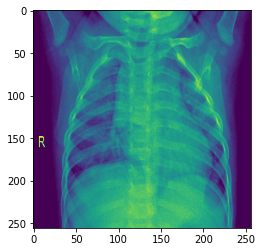

In [49]:
plt.imshow((x)[6])

In [50]:
x = x/255

In [55]:

layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256,256, 1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]

model = keras.Sequential(layers)
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 492032)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [61]:
xtrain = shuffle(x, random_state = 42)
ytrain = shuffle(y, random_state = 42)

In [62]:
history = model.fit(xtrain,
    ytrain,
    batch_size = 128,
    epochs = 20,
    validation_split = 0.2
)

Epoch 1/20
33/33 [==============================] - 788s 22s/step - loss: 0.8118 - accuracy: 0.7733 - val_loss: 0.1914 - val_accuracy: 0.9262
Epoch 2/20
33/33 [==============================] - 548s 17s/step - loss: 0.1372 - accuracy: 0.9430 - val_loss: 0.1368 - val_accuracy: 0.9502
Epoch 3/20
33/33 [==============================] - 410s 12s/step - loss: 0.0857 - accuracy: 0.9669 - val_loss: 0.0967 - val_accuracy: 0.9732
Epoch 4/20
33/33 [==============================] - 389s 12s/step - loss: 0.0595 - accuracy: 0.9806 - val_loss: 0.1157 - val_accuracy: 0.9665
Epoch 5/20
33/33 [==============================] - 390s 12s/step - loss: 0.0477 - accuracy: 0.9847 - val_loss: 0.1405 - val_accuracy: 0.9550
Epoch 6/20
33/33 [==============================] - 440s 13s/step - loss: 0.0333 - accuracy: 0.9885 - val_loss: 0.0985 - val_accuracy: 0.9732
Epoch 7/20
33/33 [==============================] - 462s 14s/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.1055 - val_accuracy: 0.9741
Epoch 

In [63]:
lista_normal_test = []
lista_neumonia_test = []
for x in os.listdir("../data/chest_xray/test/NORMAL/"):
    img = imread(os.path.join("../data/chest_xray/test/NORMAL/", x))
    lista_normal_test.append(cv2.resize(img, (256, 256)))

In [64]:
set_normal= set()
for elemento in lista_normal_test:
    set_normal.add(elemento.shape)
set_normal

{(256, 256)}

In [65]:
for x in os.listdir("../data/chest_xray/test/PNEUMONIA/"):
    img = imread(os.path.join("../data/chest_xray/test/PNEUMONIA/", x),as_gray=True)
    lista_neumonia_test.append(cv2.resize(img, (256, 256)))

In [66]:
set_neumonia = set()
for elemento in lista_neumonia_test:
    set_neumonia.add(elemento.shape)
set_neumonia

{(256, 256)}

In [68]:
array_normal_test = np.array(lista_normal_test)
array_neumonia_test = np.array(lista_neumonia_test)

In [69]:
test = pd.DataFrame()

In [70]:
test = test.append(pd.DataFrame({"target":np.full(array_normal_test.shape[0], 0)}))

In [71]:
test = test.append(pd.DataFrame({"target":np.full(array_neumonia_test.shape[0], 1)}), ignore_index=True)

In [74]:
x_test = np.concatenate((array_normal_test, array_neumonia_test))

In [75]:
y_test = test["target"]

In [76]:
x_test = x_test / 255

In [78]:
model.evaluate(x_test, y_test)

20/20 [==============================] - 10s 516ms/step - loss: 2.8547 - accuracy: 0.7372


[2.854746103286743, 0.7371794581413269]

In [81]:
predict = model.predict(x_test)

20/20 [==============================] - 13s 636ms/step


In [116]:
print ("Accuracy:",metrics.accuracy_score(y_test, predict.round()))
print("Recall:" , metrics.recall_score(y_test, predict.round()))
print("Precission:", metrics.precision_score(y_test, predict.round()))

Accuracy: 0.7371794871794872
Recall: 0.9948717948717949
Recall: 0.7054545454545454


<AxesSubplot:>

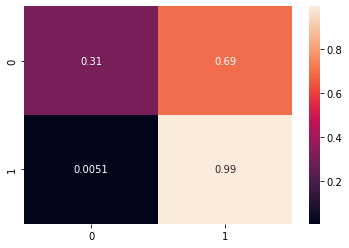

In [109]:
sns.heatmap(metrics.confusion_matrix(y_test, predict.round(), normalize='true'), annot=True)